In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [23]:

connection_matrix = np.array(
[[0, 5, 0, 1, 0, 0, 0, 0],
 [5, 0, 0, 4, 0, 0, 0, 8],
 [0, 0, 0, 2, 0, 0, 6, 0],
 [1, 4, 2, 0, 2, 4, 0, 0],
 [0, 0, 0, 2, 0, 0, 0, 8],
 [0, 0, 0, 4, 0, 0, 9, 7],
 [0, 0, 6, 0, 0, 9, 0, 0],
 [0, 8, 0, 0, 8, 7, 0, 0]
]
)

def setup_graph(connection_matrix: np.array):
    """Setup a graph with inital properties
    """ 

    graph = nx.from_numpy_array(connection_matrix) #create_using=nx.DiGraph)
    names = {i:chr(ord('A')+i ) for i in graph.nodes}
    graph = nx.relabel_nodes(graph, names)
    
    return graph

In [161]:
def draw_graph(graph: nx.Graph):
        """Function that draws this specific graph
         -"""
        fig, ax = plt.subplots()
        layout = {'A': np.array([-0.9,0.5]),
                'B': np.array([-0.9, -0.5]), 
                'C':np.array([-0.4,0.5]),
                'D': np.array([-0.5, 0.0]),
                'E': np.array([-0.4, -0.3]), 
                'F': np.array([0.2, 0.0]),
                'G': np.array([0.3, 0.5]), 
                'H': np.array([0.3, -0.45]),
                }

        node_colors = ['lightblue']*8
        nx.draw_networkx_nodes(graph, pos= layout, node_color=node_colors, ax = ax) 
        nx.draw_networkx_labels(graph, pos =layout,font_color='black', ax = ax)
        nx.draw_networkx_edge_labels(graph, pos=layout, font_size = 15, 
                                     verticalalignment='top',
                                     horizontalalignment='right',
                                     edge_labels= nx.get_edge_attributes(graph, 'weight'))
        nx.draw_networkx_edges(graph, layout, edge_color='black', ax = ax)

In [35]:
graph = setup_graph(connection_matrix)

In [171]:
def prims(graph: nx.graph):
    """Prim's agorithm for builidng a minimum spanning tree of a 
    weighted graph
    note that this implementation is ad hoc for a given task and not tested
    for various graph inputs. 
    parameters:
        graph[nx.graph]: weighted undirected networkx graph
    output[nx.graph]:
        graph that is a minimal spanning tree
    """
    
    edges = sorted([(k,v) for k,v in nx.get_edge_attributes(graph, 'weight').items()],key = lambda x: x[1], reverse = False)
    remaining_nodes = set(graph.nodes) 
    out_graph = nx.graph.Graph()
    
    edge, weight = edges[0]    
    del edges[0] 
    out_graph.add_edge(*edge, weight = weight)
    remaining_nodes -= set(edge) # edge is repr as (node1, node2)
    
    while len(remaining_nodes) > 0 and len(edges) > 0:
        for idx, edge in enumerate(edges): 
            nds, wght = edge
            if nds[0] in out_graph.nodes and nds[1] in remaining_nodes:
                out_graph.add_edge(*nds, weight = wght)
                remaining_nodes -= set(nds[1])
                del edges[idx]
                break
            elif nds[1] in out_graph.nodes and nds[0] in remaining_nodes: # since the graph is undirected
                out_graph.add_edge(nds[1], nds[0], weight = wght)
                remaining_nodes -= set(nds[0])
                del edges[idx]
                break

    return out_graph 


In [172]:
spanning_tree = prims(graph)

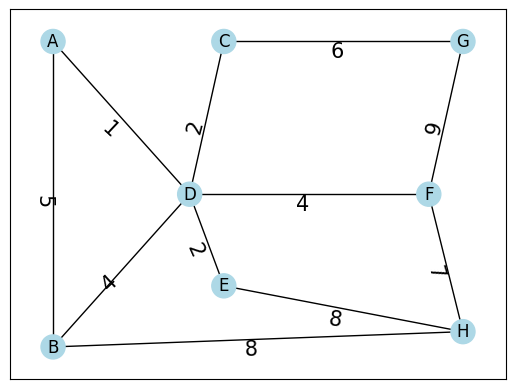

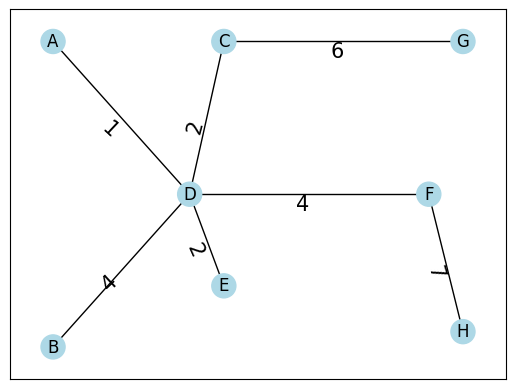

In [173]:
draw_graph(graph)
draw_graph(spanning_tree)

In [180]:
minimal_edge_sum = sum(nx.get_edge_attributes(spanning_tree, 'weight').values())

print(f"The minimal sum of edges connecting every node is {minimal_edge_sum} which is below the constraint of 30")

The minimal sum of edges connecting ever node is 26


#### Task b) 
Restrict the number of edges for node D

In [196]:
def prims_modified(graph: nx.graph):
    """Prim's agorithm for builidng a minimum spanning tree of a 
    weighted graph
    note that this implementation is ad hoc for a given task and not tested
    for various graph inputs. 
    parameters:
        graph[nx.graph]: weighted undirected networkx graph
    output[nx.graph]:
        graph that is a minimal spanning tree
    """
    
    edges = sorted([(k,v) for k,v in nx.get_edge_attributes(graph, 'weight').items()],key = lambda x: x[1], reverse = False)
    remaining_nodes = set(graph.nodes) 
    out_graph = nx.graph.Graph()
    
    edge, weight = edges[0]    
    del edges[0] 
    out_graph.add_edge(*edge, weight = weight)
    remaining_nodes -= set(edge) # edge is repr as (node1, node2)

    n_d_connections = 1 if any([n == 'D' for n in edge]) else 0

    loop_count = 0
    while len(remaining_nodes) > 0 and len(edges) > 0:
        for idx, edge in enumerate(edges): 
            nds, wght = edge
            if any([n in out_graph.nodes for n in nds]) and any([n in remaining_nodes for n in nds]):
                if 'D' in nds:
                    if n_d_connections == 3:
                        del edges[idx]
                        break
                    else:
                        n_d_connections += 1
                        # continue
                out_graph.add_edge(*nds, weight = wght)
                remaining_nodes -= set(nds)
                del edges[idx]
                break
            print(remaining_nodes)
        loop_count += 1 
        if loop_count > 20:
            break

    return out_graph 


In [199]:
mod_tree = prims_modified(graph)

{'H', 'F'}


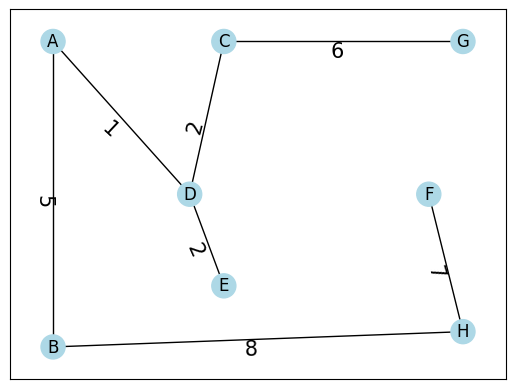

In [200]:
draw_graph(mod_tree)

In [203]:
minimal_edge_sum = sum(nx.get_edge_attributes(mod_tree, 'weight').values())

print(f"The minimal sum of edges connecting every node, and restricting node D to 3 connections is {minimal_edge_sum} which is not below the constraint of 30")

The minimal sum of edges connecting every node, and restricting node D to 3 connections is 31 which is not below the constraint of 30
